In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')

In [2]:
df.shape

(768, 3)

In [3]:
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [9]:
X=df.iloc[:,:-1].to_numpy()
y=df.iloc[:,-1].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

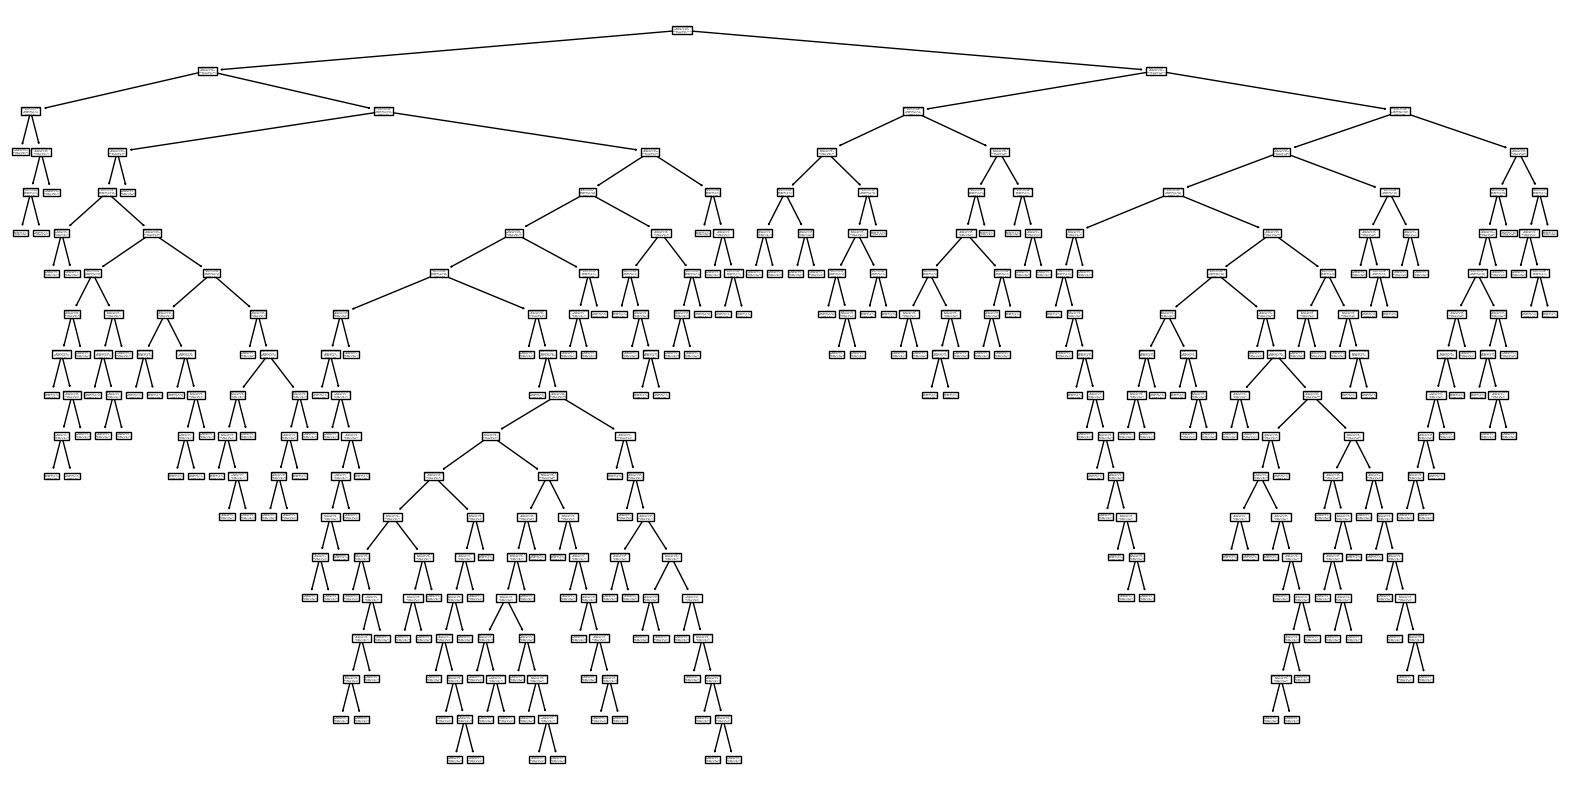

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=['Glucose','BMI'],class_names=['No','Yes'])
plt.show()

In [19]:
clf.set_params(max_depth=3)

DecisionTreeClassifier(max_depth=3, random_state=0)

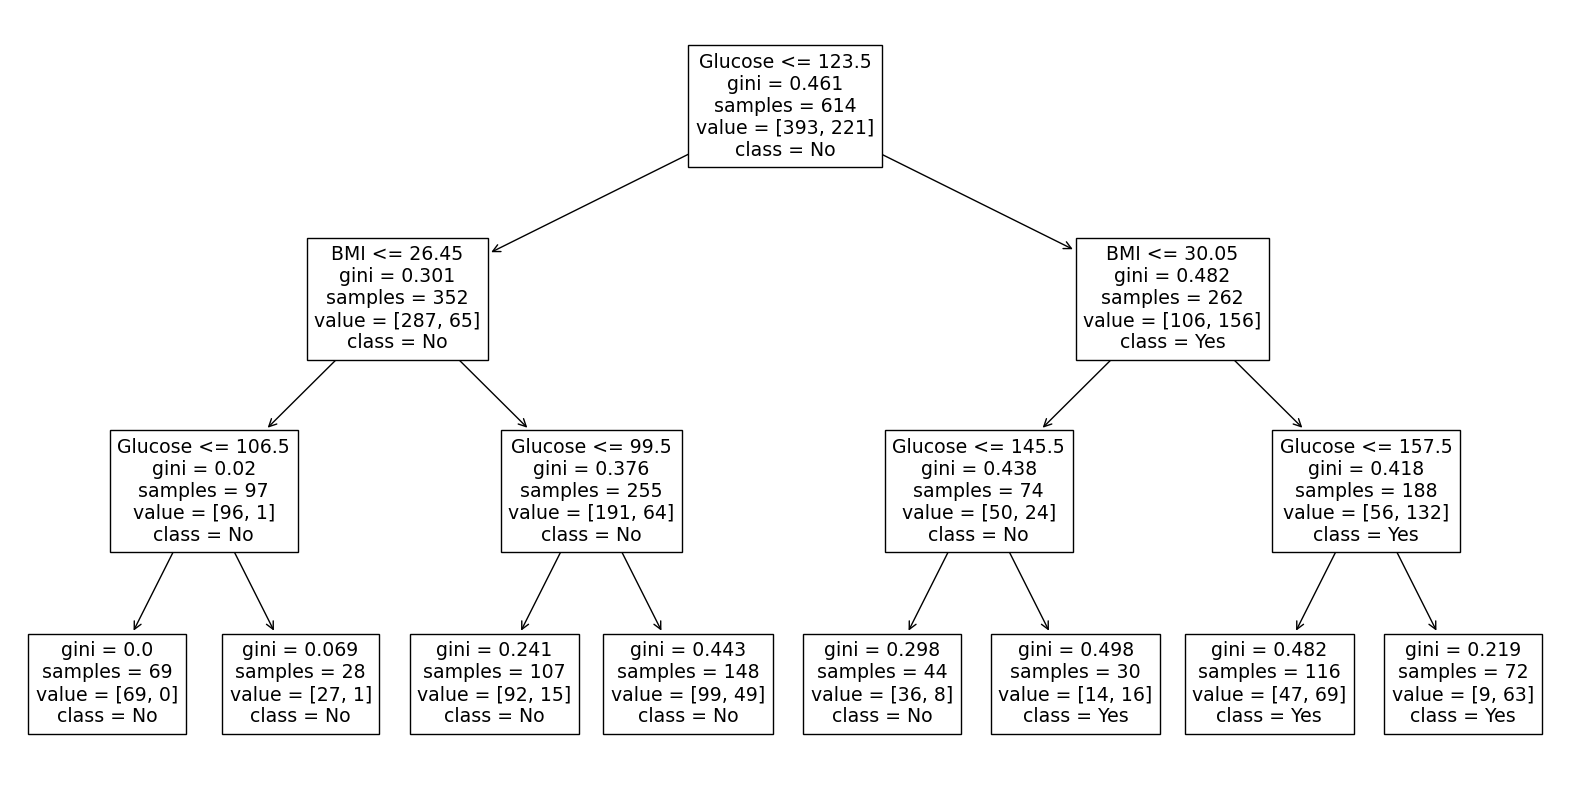

In [20]:
clf.fit(X_train,y_train)
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=['Glucose','BMI'],class_names=['No','Yes'])
plt.show()

In [21]:
predictions=clf.predict(X_test)

In [22]:
X_test

array([[199. ,  42.9],
       [107. ,  33.6],
       [ 76. ,  34. ],
       [166. ,  25.8],
       [111. ,  24.6],
       [ 81. ,  26.6],
       [152. ,  34.2],
       [176. ,  33.3],
       [127. ,  27.7],
       [103. ,  37.7],
       [158. ,  31.6],
       [187. ,  43.6],
       [114. ,  24.9],
       [ 82. ,  28.5],
       [ 65. ,  32. ],
       [108. ,  27.3],
       [179. ,  32.7],
       [ 73. ,  23. ],
       [132. ,  28. ],
       [ 99. ,  34. ],
       [144. ,  38.5],
       [118. ,  42.9],
       [ 87. ,  28.9],
       [ 61. ,  34.4],
       [ 97. ,  23.2],
       [124. ,  35.8],
       [104. ,  18.4],
       [153. ,  40.6],
       [112. ,  25. ],
       [110. ,  26. ],
       [136. ,  26. ],
       [102. ,  40.6],
       [102. ,  29.3],
       [122. ,  36.2],
       [119. ,  22.3],
       [168. ,  32.9],
       [136. ,  28.3],
       [117. ,  25.2],
       [119. ,  35.5],
       [180. ,  34. ],
       [119. ,  34.9],
       [ 90. ,  42.7],
       [ 99. ,  26.9],
       [193

In [23]:
clf.predict([[90,20],[200,30]])

array([0, 1], dtype=int64)

In [24]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy')
accuracy=scores.mean()
accuracy

0.7182993469278955

In [25]:
from sklearn import metrics
cf=metrics.confusion_matrix(y_test,predictions)
cf

array([[90, 17],
       [20, 27]], dtype=int64)

In [27]:
tp=cf[1][1]
tn=cf[0][0]
fp=cf[0][1]
fn=cf[1][0]
print(f"tp:{tp}, tn:{tn},fp:{fp},fn:{fn}")

tp:27, tn:90,fp:17,fn:20


In [28]:
print("accuracy",metrics.accuracy_score(y_test,predictions))

accuracy 0.7597402597402597


In [29]:
print("Precision",metrics.precision_score(y_test,predictions))

Precision 0.6136363636363636


In [30]:
print("Recall",metrics.recall_score(y_test,predictions))

Recall 0.574468085106383


In [31]:
feature_importances = clf.feature_importances_
print("Feature importances:",feature_importances)

Feature importances: [0.74096359 0.25903641]
